## Title here ( i.e., House Price Prediction)

In [1]:
# Edit all the Mardown cells below with the appropriate information 
# Run all cells, containing your code 
# Save this Jupyter with the outputs of your executed cells
# PS: Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

**Team:**
* Riker Wachtler

**Course:** CISD 43 – BIG DATA (Spring, 2024)

### Problem Statement
* This project  is about house price predictions. I wasn't very creative, so I just used the sample suggestion of houes prices.
    
    
    
* **Keywords:** House price prediction, real estate

### Required packages

* If you are using Jupyter Notebook via Anaconda with `pip` properly configured, the following lines should successfully install the required modules. They are commented out by default as to not attempt to re-install if you were to fully re-run the notebook




In [2]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install sklearn
#!pip install scikitplot

### Methodology

1. Explan your big data metodology



2. Introduce the topics you used in your project
 * Model 1
    * KNN
 
 * Model 2
    * Linear Regression
 

### Your code starts here

In [58]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv("data/house_data.csv")

In [5]:
# we're immediately just going to scrap any columns with missing valuess
df = df.dropna(0)

# clean up date

df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# Split into X & y - we need to drop id, date, price, zipcode from X
# date is now year/month, id is irrelevant, and i chose to not include the categorical data (zipcodes)
X, y = df, df["price"]
X = X.drop(["id", "date", "price", "zipcode"], axis=1)

In [44]:
# split dataset into train/test, proportioned at 25%
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, shuffle = True, test_size = 0.25)


In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


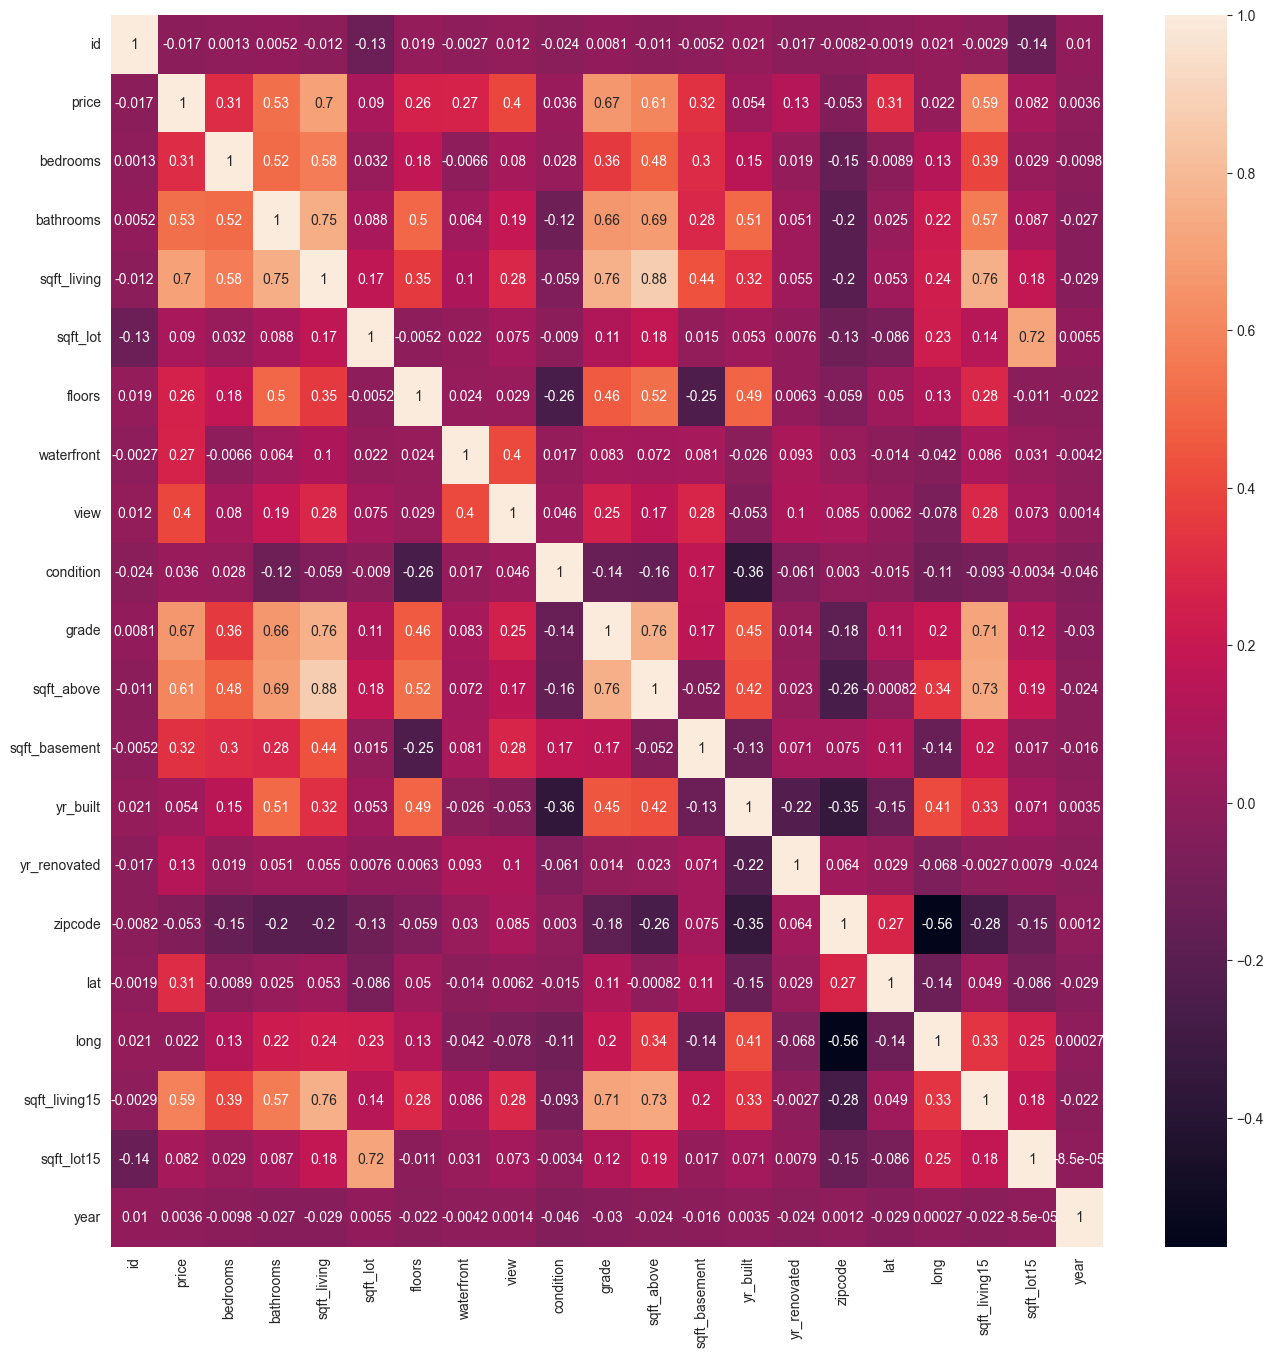

In [13]:
plt.figure(figsize = (16,16))
sns.heatmap(df.iloc[:,:-1].corr(), annot=True)
plt.show()

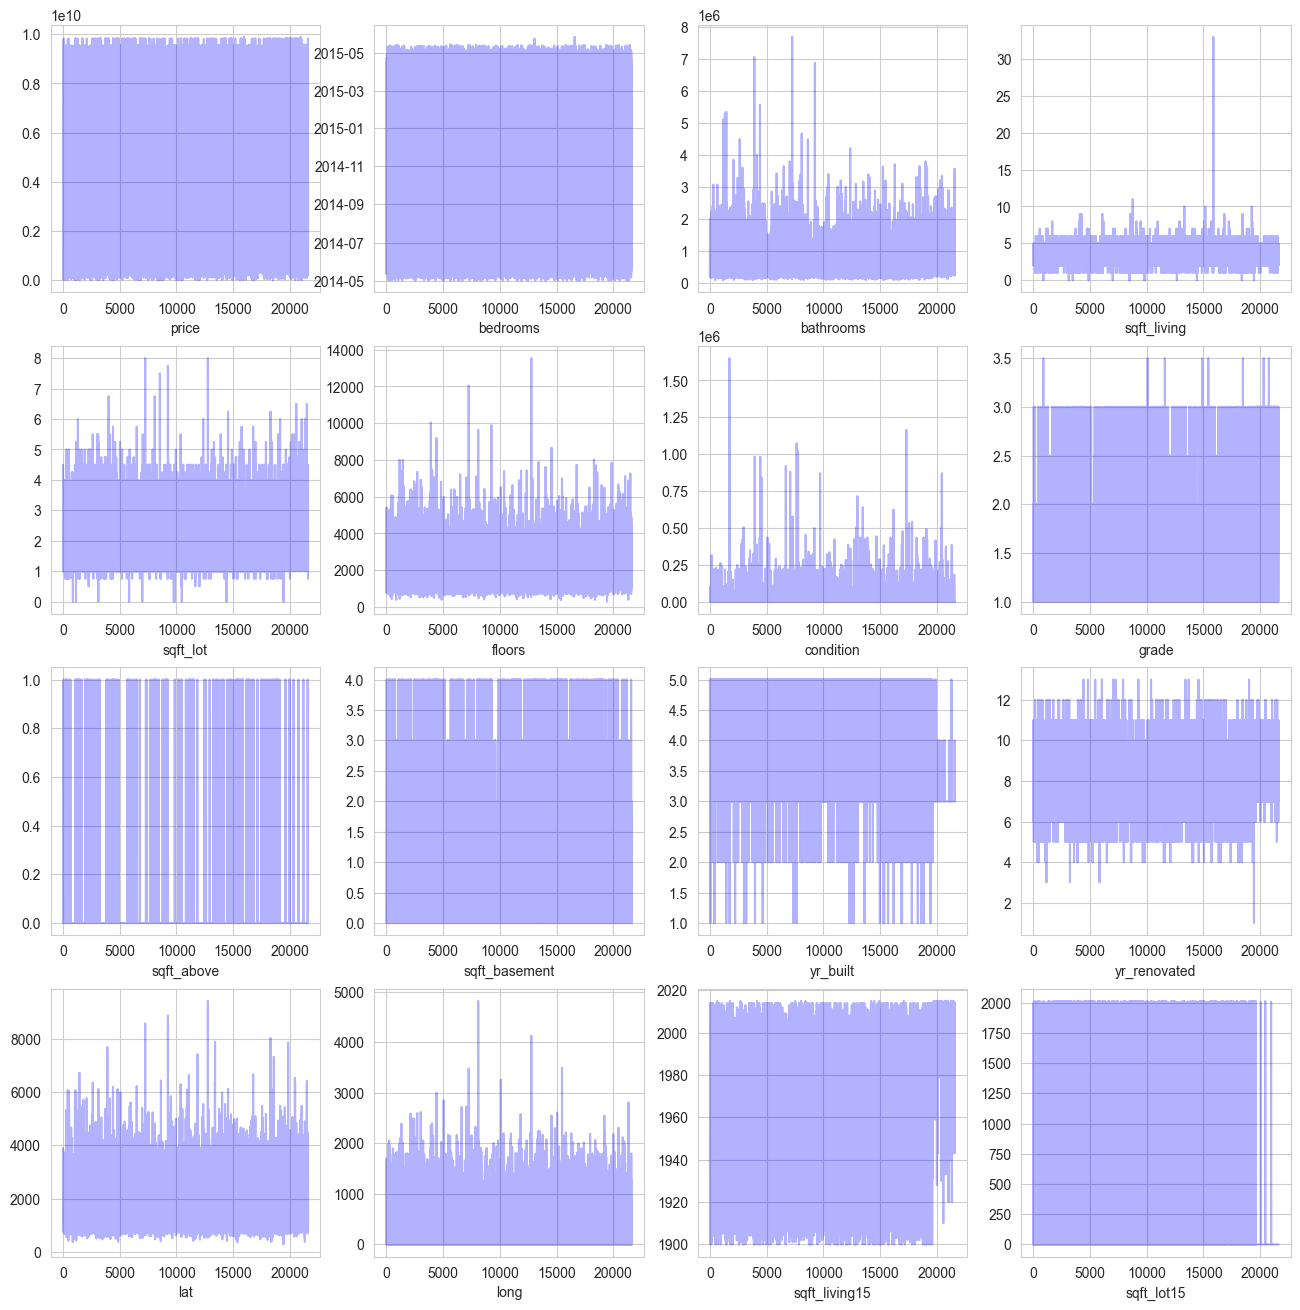

In [41]:
fig = plt.figure(figsize=(16, 16))
labels = list(df.drop(["id", "date", "view", "waterfront", "year", "month", "zipcode"], axis=1).columns)
for label in range(len(labels)):
    ax = fig.add_subplot(4,4,label+1)
    ax.plot(df.iloc[:, label], color = "blue", alpha = 0.3)
    ax.set_xlabel(labels[label])
    ax.autoscale(True)

In [ ]:
# Here is where the ML part starts

In [45]:
X_train

array([[ 0.67648506,  0.1756067 , -0.04344391, ..., -0.04645754,
         1.44790136, -1.46840343],
       [-0.39873715, -0.14900736, -0.23943274, ..., -0.27917455,
         1.44790136, -1.14740043],
       [ 1.75170727,  0.1756067 , -0.02166737, ..., -0.29184689,
        -0.69065478,  0.77861755],
       ...,
       [-0.39873715,  0.50022075, -0.65318696, ..., -0.42087774,
        -0.69065478, -0.18439144],
       [-1.47395936, -1.44746357, -1.39358923, ..., -0.27075073,
        -0.69065478,  1.42062355],
       [-1.47395936, -1.44746357, -0.78384618, ..., -0.00616973,
        -0.69065478,  0.13661156]])

In [46]:
X_test

array([[-1.47395936, -1.44746357, -0.37009197, ..., -0.17098348,
        -0.69065478,  1.09962055],
       [-0.39873715,  0.8248348 ,  0.66647122, ..., -0.25888414,
         1.44790136, -1.14740043],
       [-1.47395936, -1.44746357, -1.01249983, ..., -0.07612401,
        -0.69065478,  1.09962055],
       ...,
       [-1.47395936, -1.44746357, -1.28470655, ..., -0.27778279,
         1.44790136, -1.78940643],
       [-0.39873715,  0.1756067 , -0.30476236, ..., -0.15190171,
        -0.69065478,  1.09962055],
       [ 0.67648506, -0.14900736, -0.1849914 , ...,  0.1037061 ,
        -0.69065478,  0.45761455]])

In [47]:
K = []
scores = []

for i in range(2, 10):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    s = knn.score(X_test, y_test)
    print(f"k = {i}: {s}")
    scores.append(s)

print(scores)

k = 2: 0.7414030057849562
k = 3: 0.766575752224133
k = 4: 0.7742231283592205
k = 5: 0.7812822298714657
k = 6: 0.7844945931859527
k = 7: 0.7878581007483119
k = 8: 0.7894831792276535
k = 9: 0.7904318377078658
[0.7414030057849562, 0.766575752224133, 0.7742231283592205, 0.7812822298714657, 0.7844945931859527, 0.7878581007483119, 0.7894831792276535, 0.7904318377078658]


In [48]:
good_k = np.argmax(scores) + 1

knn = KNeighborsRegressor(n_neighbors = good_k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [49]:
y_pred = knn.predict(X_test)

In [50]:
r2_score(y_test, y_pred)

0.7894831792276535

In [51]:
mean_squared_error(y_test, y_pred)

25681060979.49989

Text(0, 0.5, 'actual price')

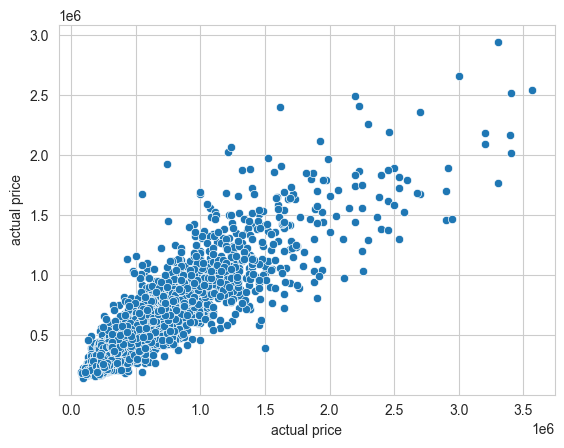

In [57]:
sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel("actual price")
plt.ylabel("actual price")

In [67]:
reg = LinearRegression()
reg.fit(X_train, y_train)

reg.score(X_test, y_test), reg.coef_

(0.6925495620411505,
 array([-39241.12953713,  34324.78619446,  87410.07508251,   6321.57012566,
         -2571.62511083,  47898.12687306,  38942.01578742,  20425.65307168,
        113778.66497505,  82184.29435247,  27622.24240613, -70742.14923179,
          9304.95451654,  76900.85415064, -18174.16249917,  11997.57351894,
        -10604.10639166,  17626.82769587,   4711.39783398]))

In [63]:
y_pred = reg.predict(X_test)

In [64]:
r2_score(y_test, y_pred)

0.6925495620411505

In [65]:
mean_squared_error(y_test, y_pred)

37506045438.21011

Text(0, 0.5, 'actual price')

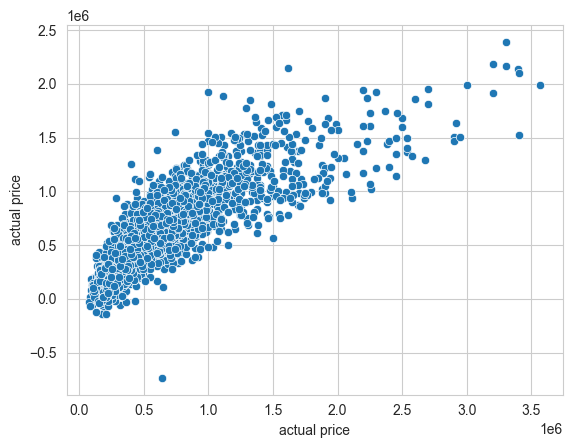

In [66]:
sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel("actual price")
plt.ylabel("actual price")

### Conclusions


In [71]:
print("""
Overall, KNN was obviously much better - I'm not really surprised. It's definitely more involved than plain linear regression. 

The r2 score was lower for both than I was hoping for - loosely, it means that the dataset accounted for 78% of the variance (in the KNN regressor), and then only 69% in the linear regression. This is probably not entirely accurate, since I'd say house prices are close to 90% at minimum, but who knows - maybe I know something the real estate market doesn't!

The MSE is abysmal because house prices are so high. Unfortunately, it's not a very useful metric here - however, it would be remiss to NOT show it, because it's a staple metric of regression problems.""")


Overall, KNN was obviously much better - I'm not really surprised. It's definitely more involved than plain linear regression. 

The r2 score was lower for both than I was hoping for - loosely, it means that the dataset accounted for 78% of the variance (in the KNN regressor), and then only 69% in the linear regression. This is probably not entirely accurate, since I'd say house prices are close to 90% at minimum, but who knows - maybe I know something the real estate market doesn't!

The MSE is abysmal because house prices are so high. Unfortunately, it's not a very useful metric here - however, it would be remiss to NOT show it, because it's a staple metric of regression problems.


###  References
   - Academic (if any)
   - Online (if any)
	

In [69]:
print("""None applicable, I think.""")

None applicable, I think.


### Credits

- If you use and/or adapt your code from existing projects, you must provide links and acknowldge the authors. 
> *This code is based on .... (if any)*

In [68]:
print("""This code is based on the template that existed here before me, and also the sklearn docs (that I had to double check a bunch of the exact packages things were in). I used no other external sources for code help.""")

This code is based on the template that existed here before me, and also the sklearn docs (that I had to double check a bunch of the exact packages things were in). I used no other external sources for code help.


In [ ]:
# End of Project